In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
x=np.array([1,2,3,4,5,6])
y=np.array([10,98,8,2,3,4])


In [4]:
# w값 바꾸지 않기 위해 사용, 검증용이며 실제에서는 seed 하지 X
tf.random.set_seed(1234)

In [11]:
input_layer=tf.keras.layers.InputLayer(input_shape=(1,))
hidden_layer1=tf.keras.layers.Dense(units=4,activation='relu')
hidden_layer2=tf.keras.layers.Dense(units=2,activation='relu')
output_layer=tf.keras.layers.Dense(units=1)
#activation 이 없으면 활성화함수 wx+b가 되어있는 것임.
model=keras.Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    output_layer
])


In [12]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])



In [13]:
print(model.fit(x,y))
print(model.predict(x))
print(model.evaluate(x,y))

1/1 [==============================] - 0s 94ms/step
[[0.02402525]
 [0.04672664]
 [0.06942802]
 [0.0921294 ]
 [0.11483078]
 [0.13753216]]
1/1 [==============================] - 0s 194ms/step - loss: 1630.6899 - accuracy: 0.0000e+00
[1630.68994140625, 0.0]


In [20]:
modelvalue=model.weights
modelvalue
# 0,1 인덱스, dense(units=4) w,b  / x값이 6*1이므로  w= 1*4 , b=4
# 2,3 인덱스, dense(units=2) w,b  / w=2, b= 2
# 4,5 인덱스, dense(units=1) w,b  / w=1, b=1

len(modelvalue) # 6개는 unit 수
# Dense 층 *2개 ( dense 층 마다 weight,bias 값이 있음)

6

In [23]:
modelvalue[0].shape ## 1*4 구조로 되어있다

TensorShape([1, 4])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 8         
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
## 0번의 값

intermediate_layer_model= tf.keras.Model(inputs=model.input,
                                         outputs=model.layers[0].output)
intermediate_output=intermediate_layer_model(x)

print('\n==========Outputs of Hidden Layer ==================')
print(intermediate_output)


==========Outputs of Hidden Layer ==================
tf.Tensor(
[[0.         0.05520619 0.01126648 0.6333885 ]
 [0.         0.10941239 0.02153297 1.2657771 ]
 [0.         0.16361858 0.03179946 1.8981656 ]
 [0.         0.21782477 0.04206594 2.530554  ]
 [0.         0.27203098 0.05233243 3.1629426 ]
 [0.         0.32623717 0.06259892 3.795331  ]], shape=(6, 4), dtype=float32)


In [24]:
#hidden_layer2=tf.keras.layers.Dense(units=2,activation='relu')
# 위의 첫번쨰는 6행 1열, 1*(4개 w) == 6행 4열 짜리 출력
# 이제 그 6행 4열짜리로 4(x변수 4개 각각w)*(2개 w) -> 6행 2열
modelvalue[2:5]

[<tf.Variable 'dense_4/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[-0.2733593 , -0.6517687 ],
        [ 0.2121225 ,  0.8971169 ],
        [ 0.69408804,  0.24601674],
        [ 0.20449787, -0.7789748 ]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([0.00099999, 0.        ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.1534434],
        [1.1321725]], dtype=float32)>]

In [25]:
## 1번의 값
# 6행 2열의 결과
intermediate_layer_model= tf.keras.Model(inputs=model.input,
                                         outputs=model.layers[1].output)
intermediate_output=intermediate_layer_model(x)

print('\n==========Outputs of Hidden Layer ==================')
print(intermediate_output)


==========Outputs of Hidden Layer ==================
tf.Tensor(
[[0.150057   0.        ]
 [0.29800332 0.        ]
 [0.4459496  0.        ]
 [0.5938959  0.        ]
 [0.7418422  0.        ]
 [0.8897885  0.        ]], shape=(6, 2), dtype=float32)


# 패션 MNIST

In [24]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
train_images.shape,len(train_labels)

((60000, 28, 28), 60000)

In [28]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


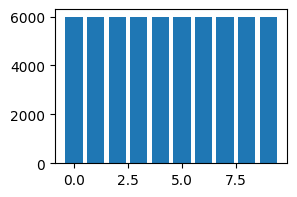

In [29]:
## 추가코드
def label_Unique(data):
  tmp=np.unique(data, return_counts=True)
  print(tmp)
  plt.figure(figsize=(3,2))
  plt.bar(tmp[0],tmp[1])
  plt.show()
label_Unique(train_labels)


In [30]:
test_images.shape,len(test_labels)

((10000, 28, 28), 10000)

In [31]:
train_images[0].min(),train_images[0].max() # 정규화 x 확인, 파이썬 정규화 ,표준화 하는 이유

(0, 255)

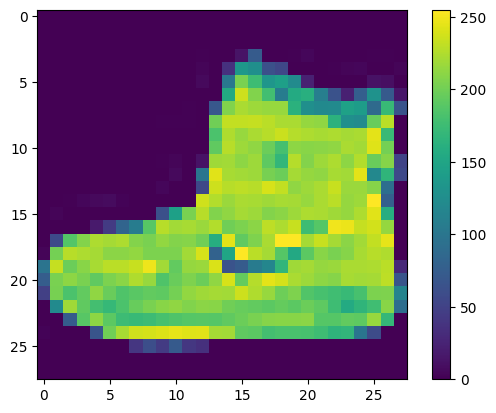

In [32]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
train_images = train_images / 255.0
test_images = test_images / 255.0


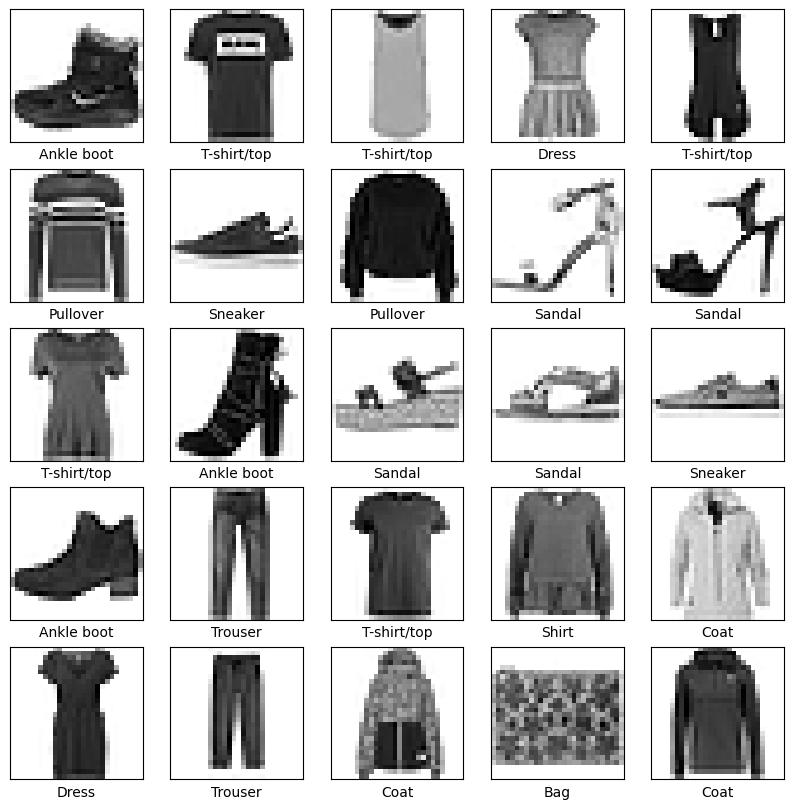

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) ## 반드시 softmax 함수를 사용해야함, 원핫인코딩되어있어야함, 여기에 사용하지 X 모델 컴파일 loss에 사용하면 됨
])

In [36]:
model.compile(optimizer='adam',
              #원핫인코딩을 컴파일하면서 하자, 함수를 알아서 하자 from_logits=True
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # 원핫 인코딩을 컴파일 하면서 하자
              metrics=['accuracy'])

In [37]:
#########
## 모델저장
###
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)  # 1이면(기본) 나오고 0이면 안나옴
# tensor는 batch_size 설정안하면 32개씩 설정됨

hist=model.fit(train_images, train_labels,
               epochs=3,
               validation_data=(test_images, test_labels),callbacks=[checkpointer]
               ,verbose=1) # 1이 기본( 실행결과나오는)


Epoch 1/3
1875/1875 [==============================] - ETA: 0s - loss: 0.4977 - accuracy: 0.8252
Epoch 1: saving model to ./model/01-0.8382.hdf5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4977 - accuracy: 0.8252 - val_loss: 0.4410 - val_accuracy: 0.8382
Epoch 2/3
  44/1875 [..............................] - ETA: 6s - loss: 0.4021 - accuracy: 0.8580

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1873/1875 [============================>.] - ETA: 0s - loss: 0.3729 - accuracy: 0.8651
Epoch 2: saving model to ./model/02-0.8617.hdf5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3729 - accuracy: 0.8651 - val_loss: 0.3910 - val_accuracy: 0.8617
Epoch 3/3
1862/1875 [============================>.] - ETA: 0s - loss: 0.3341 - accuracy: 0.8782
Epoch 3: saving model to ./model/03-0.8710.hdf5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3339 - accuracy: 0.8782 - val_loss: 0.3618 - val_accuracy: 0.8710


In [38]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3618 - accuracy: 0.8710 - 1s/epoch - 3ms/step

Test accuracy: 0.8709999918937683


In [39]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [40]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [41]:
predictions[0]

array([1.9754783e-05, 2.4547688e-07, 7.0889228e-06, 3.2878182e-07,
       2.0557500e-05, 3.0657275e-02, 7.8959922e-05, 6.8269409e-02,
       7.7576574e-04, 9.0017056e-01], dtype=float32)

In [42]:
#####################33
## 이 예측은 10개의 숫자 배열로 나타납니다.
### 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다.
## 가장 높은 신뢰도를 가진 레이블을 찾아보죠:

np.argmax(predictions[0])

9

In [57]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

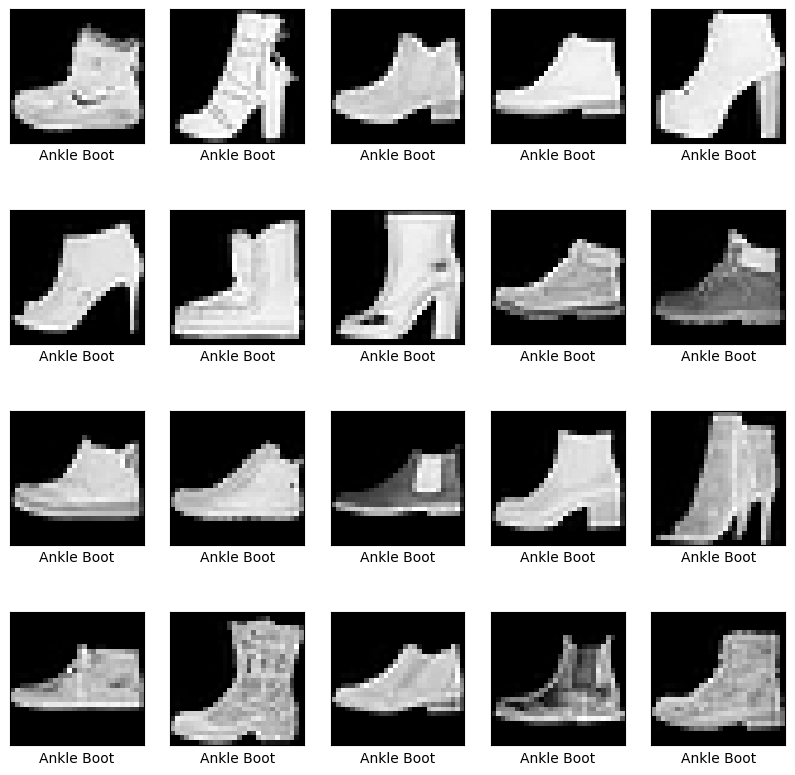

In [62]:
ankle_idx = [i for i, label in enumerate(train_labels) if label == 9]
ankle_img = train_images[ankle_idx]

plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ankle_img[i], cmap='gray')
    plt.xlabel("Ankle Boot")
plt.show()

In [59]:
ankle_idx[:6]


[0, 11, 15, 42, 44, 79]

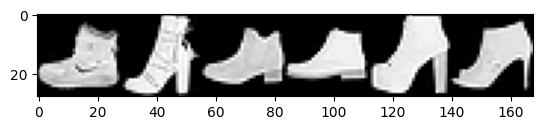

In [61]:
img=np.hstack(train_images[ankle_idx[:6]])
plt.imshow(img,cmap='gray')

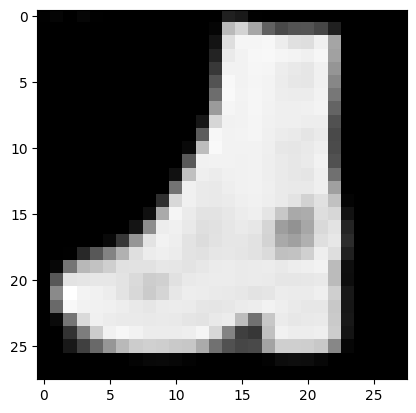

In [64]:
from PIL import Image
img=Image.open('boots.png').resize((28,28)).convert('L')
img=255-np.array(img)
plt.imshow(img,cmap='gray')



In [68]:
img.shape

(28, 28)

In [69]:
img = (np.expand_dims(img,0))
#img=np.reshape(img,(1,28,28))
img.shape

(1, 28, 28)

In [71]:
result=probability_model.predict(img)
result

1/1 [==============================] - 0s 23ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [73]:
result.argmax(),class_names[result.argmax()]

(9, 'Ankle boot')

In [74]:
hist.history

{'loss': [0.4976707696914673, 0.37286168336868286, 0.3339258134365082],
 'accuracy': [0.8252333402633667, 0.865066647529602, 0.8781833052635193],
 'val_loss': [0.4410458505153656, 0.3909539580345154, 0.36183786392211914],
 'val_accuracy': [0.8381999731063843, 0.8616999983787537, 0.8709999918937683]}

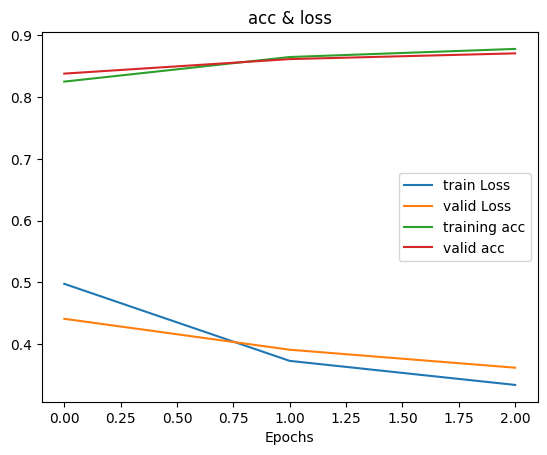

In [83]:
plt.plot(hist.history['loss'],label='train Loss')
plt.plot(hist.history['val_loss'],label='valid Loss')
plt.xlabel('Epochs')
#####################################################3333

plt.plot(hist.history['accuracy'],label='training acc')
plt.plot(hist.history['val_accuracy'],label='valid acc')
plt.xlabel('Epochs')
plt.title('acc & loss')
plt.legend() # 범례 표시
plt.show()

# 정확도 평가
- 다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다
- 만들어진 모델의 레이어당 w,b를 이용한 계산 결과의 최종값이 test_label값과 같은가( 그 갯수를 파악하고 전체 갯수에서 몇분의 몇인지 파악)
- 지금 이 자료는 10개의 카테고리중 한개 카테고리 맞추기(softmax 활성화 함수: wx+b를 하고 시그모이드를 한 10개의 값을 다 더해서 각 값을 나눈값 (다 더하면 1이 나와야함))

In [84]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3618 - accuracy: 0.8710 - 493ms/epoch - 2ms/step

Test accuracy: 0.8709999918937683


# 예측하기
- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행 할 수 있다.
- y값을 원핫인코딩해서 넣으면 model.predict 하면 됨
- y값을 원핫인코딩 안하고 넣으면  
                    model.predict -> X
                    tf.nn.softmax -> O
    => 이 코드의 이슈는 최종레이어의 softmax 함수를 사용하지 않았기 떄문에 예측할때 아래 코드가 추가되어야 함 .
    
    probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])


In [100]:
# 최종 레이어에 softmax가 없었기에 softmax를 추가하고 계산
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


yhat: Ankle boot /    Real: Ankle boot


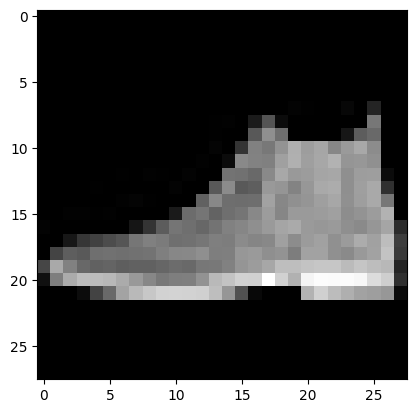

In [108]:
# 테스트 이미지의 첫번째 자료를 확인하기
(predictions[0], np.sum(predictions[0]))

bun=np.argmax(predictions[0])
yhat=class_names[bun]
print('yhat:',yhat,'/    Real:',class_names[test_labels[0]])

plt.imshow(test_images[0],cmap='gray')

In [95]:
# 원핫 인코딩으로 되어 있는 y값을 넣었을때는 이렇게 예측함
#### 추가
########################################################
tmp=model.predict(img) ## 원핫 인코딩 이 적용된 img인 경우에는 가능
tmp[0],np.sum(tmp[0])

1/1 [==============================] - 0s 37ms/step


(array([-1096.819   , -1770.1296  , -1735.1575  , -1261.8735  ,
        -1447.7666  ,  -691.5722  ,  -992.4306  ,  -688.63416 ,
        -1723.6478  ,    95.947205], dtype=float32),
 -11312.083)

우리는 원핫 인코딩으로 안넣었기에 이러면 X

In [118]:
bunList=[]
yhatList=[]
cnt=0
for i in range(0,len(predictions)):
  bunList.append(np.argmax(predictions[i]))
  yhatList.append(class_names[bunList[i]])

  if yhatList[i]!=class_names[test_labels[i]]:
    print('yhat:',yhatList[i],'/    Real:',class_names[test_labels[i]])
    cnt+=1
print(cnt)



yhat: Pullover /    Real: Coat
yhat: Sandal /    Real: Ankle boot
yhat: Pullover /    Real: Coat
yhat: Coat /    Real: Dress
yhat: T-shirt/top /    Real: Shirt
yhat: Shirt /    Real: Dress
yhat: Shirt /    Real: Pullover
yhat: Pullover /    Real: Coat
yhat: Shirt /    Real: Coat
yhat: T-shirt/top /    Real: Pullover
yhat: Coat /    Real: Dress
yhat: Sneaker /    Real: Ankle boot
yhat: Pullover /    Real: Shirt
yhat: Shirt /    Real: Pullover
yhat: Sandal /    Real: Ankle boot
yhat: Shirt /    Real: Coat
yhat: Shirt /    Real: Pullover
yhat: Shirt /    Real: T-shirt/top
yhat: Dress /    Real: Shirt
yhat: Dress /    Real: Coat
yhat: Pullover /    Real: Coat
yhat: Dress /    Real: Coat
yhat: Sandal /    Real: Ankle boot
yhat: Shirt /    Real: Pullover
yhat: Coat /    Real: Pullover
yhat: Dress /    Real: Pullover
yhat: Shirt /    Real: Pullover
yhat: Pullover /    Real: Coat
yhat: Coat /    Real: Shirt
yhat: Pullover /    Real: Shirt
yhat: Shirt /    Real: Pullover
yhat: Coat /    Real: P

In [124]:

import numpy as np


arr = np.array([[3, 2],
                [1, 6],
                [5, 4],
                [9, 7]])


max_indices = np.argmax(arr, axis=0)

print("배열:")
print(arr)
print("각 행에서 최대값이 있는 열의 인덱스:")
print(max_indices)


배열:
[[3 2]
 [1 6]
 [5 4]
 [9 7]]
각 행에서 최대값이 있는 열의 인덱스:
[3 3]
